#**Question 4.**

**In this problem, you will develop a model to predict whether a given car gets high or low gas
mileage based on the Auto data set. For each question, you must comment on the output of your code and
provide a brief interpretation of the results.**

a. Create a binary variable, mpg01, that contains a 1 if mpg contains a value above its median, and a 0 if mpg
contains a value below its median. You can compute the median using the median() function. Note you may
find it helpful to use the data.frame() function to create a single data set containing both mpg01 and the
other Auto variables.

In [ ]:
import pandas as pd

#In horsepower column some invalid value ? is there, that's why at the time of data populator "?" is replaced by NAN
Auto_Details=pd.read_csv('Auto.csv', na_values=['?'])

Auto_Details['mpg01'] = (Auto_Details['mpg'] > Auto_Details['mpg'].median()).astype(int)
print("MPG Median: ",Auto_Details['mpg'].median())
# Set pandas option to display all rows and columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

# Print the full dataset
print("Full Dataset:")
print(Auto_Details)


MPG Median:  23.0
Full Dataset:
      mpg  cylinders  displacement  horsepower  weight  acceleration  year  origin                                  name  mpg01
0    18.0          8         307.0       130.0    3504          12.0    70       1             chevrolet chevelle malibu      0
1    15.0          8         350.0       165.0    3693          11.5    70       1                     buick skylark 320      0
2    18.0          8         318.0       150.0    3436          11.0    70       1                    plymouth satellite      0
3    16.0          8         304.0       150.0    3433          12.0    70       1                         amc rebel sst      0
4    17.0          8         302.0       140.0    3449          10.5    70       1                           ford torino      0
5    15.0          8         429.0       198.0    4341          10.0    70       1                      ford galaxie 500      0
6    14.0          8         454.0       220.0    4354           9.0    

**Comments:** Create a new column mpg01 in the auto data set. If the value is above the median, then mpg01 value is 1.

**b. Explore the data graphically in order to investigate the association between mpg01 and the other features.
Which of the other features seem most likely to be useful in predicting mpg01? Scatterplots and boxplots may
be useful tools to answer this question. Describe your findings.**

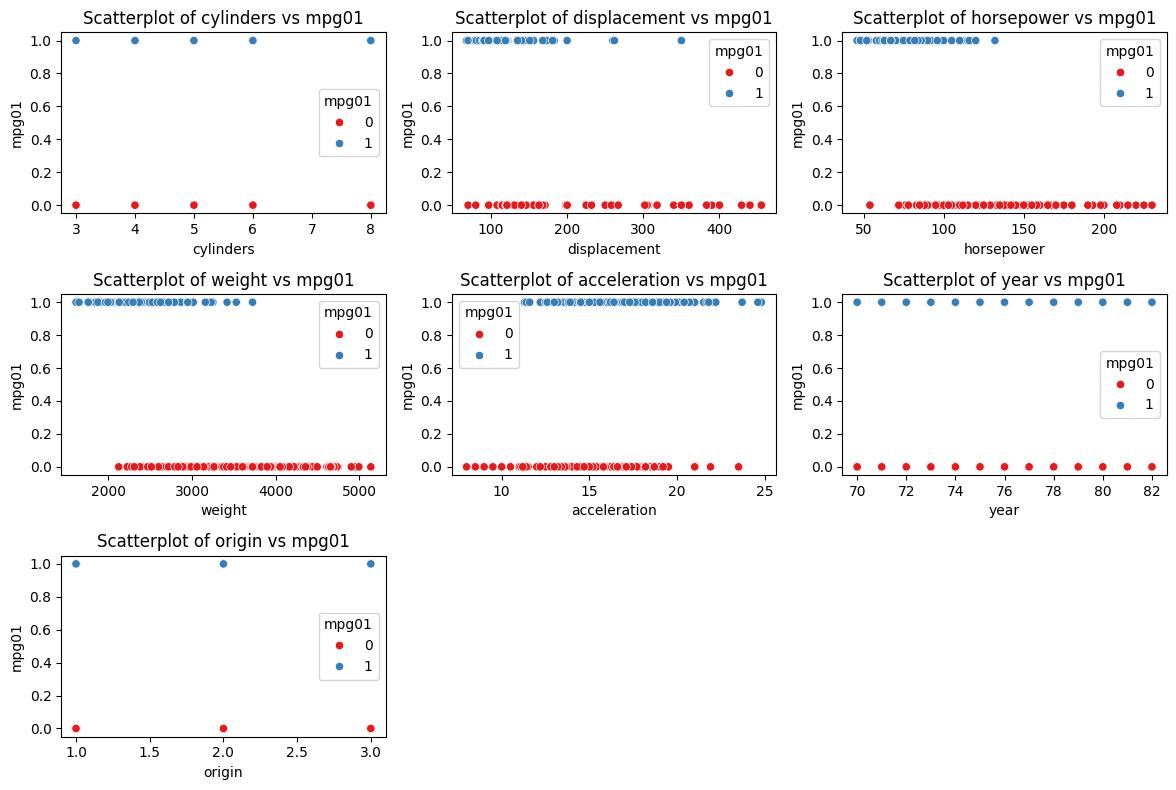

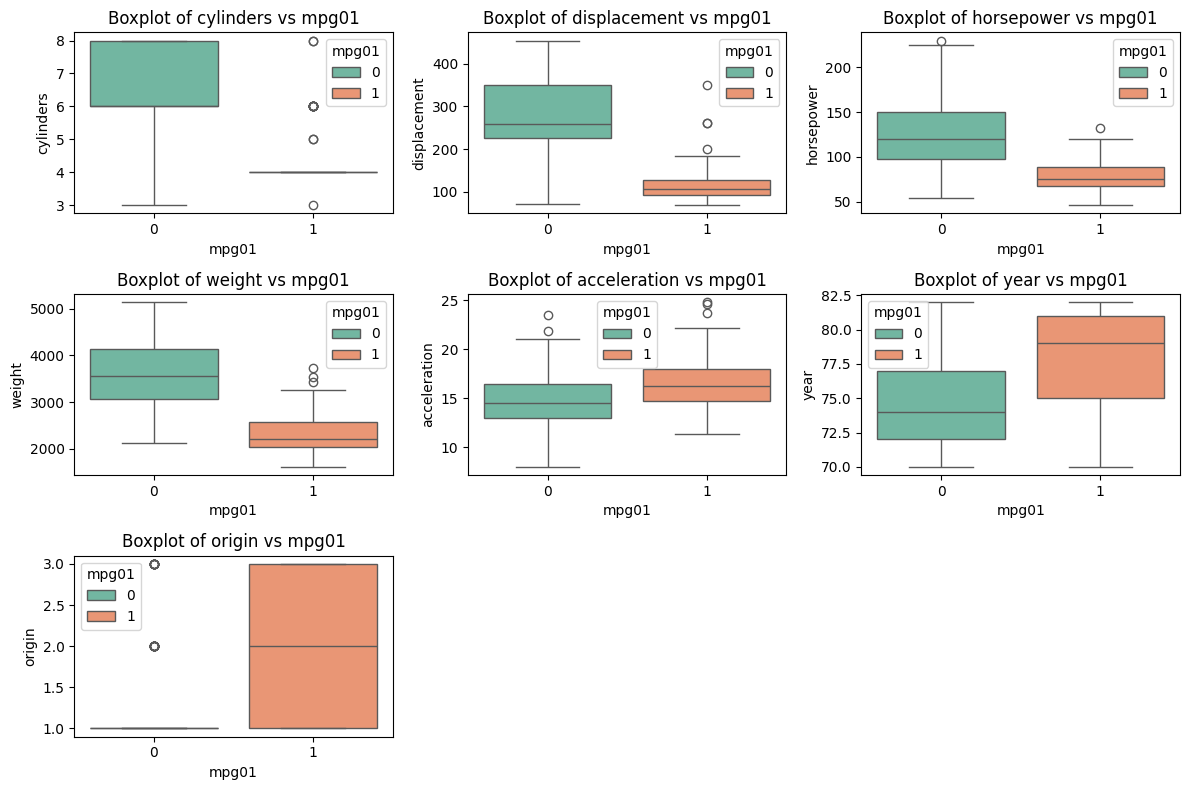

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Scatterplots for continuous features
plt.figure(figsize=(12, 8))
for i, feature in enumerate(['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration','year','origin']):
    plt.subplot(3, 3, i + 1)
    sns.scatterplot(x=feature, y='mpg01', hue='mpg01', data=Auto_Details, palette='Set1')
    plt.title(f"Scatterplot of {feature} vs mpg01")
plt.tight_layout()
plt.show()

# Boxplots for continuous features
plt.figure(figsize=(12, 8))
for i, feature in enumerate(['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration','year','origin']):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(x='mpg01', y=feature, hue='mpg01',data=Auto_Details, palette='Set2')
    plt.title(f"Boxplot of {feature} vs mpg01")
plt.tight_layout()
plt.show()


In [ ]:
Auto_Details_Corr = Auto_Details.drop(columns=['name'], errors='ignore')
Auto_Details_Corr.corr()


,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,mpg01
mpg,1.000000,-0.776260,-0.804443,-0.778427,-0.831739,0.422297,0.581469,0.563698,0.838239
cylinders,-0.776260,1.000000,0.950920,0.842983,0.897017,-0.504061,-0.346717,-0.564972,-0.740327
displacement,-0.804443,0.950920,1.000000,0.897257,0.933104,-0.544162,-0.369804,-0.610664,-0.738607
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171,-0.649259
weight,-0.831739,0.897017,0.933104,0.864538,1.000000,-0.419502,-0.307900,-0.581265,-0.745734
acceleration,0.422297,-0.504061,-0.544162,-0.689196,-0.419502,1.000000,0.282901,0.210084,0.322629
year,0.581469,-0.346717,-0.369804,-0.416361,-0.307900,0.282901,1.000000,0.184314,0.454108
origin,0.563698,-0.564972,-0.610664,-0.455171,-0.581265,0.210084,0.184314,1.000000,0.511393
mpg01,0.838239,-0.740327,-0.738607,-0.649259,-0.745734,0.322629,0.454108,0.511393,1.000000


**Comments:** Cylinders, displacement, horsepower, and weight are likely to be the most useful predictors of mpg01, with year, acceleration, and origin being less predictive.

**c. Split the data into a training set and a test set.**

In [ ]:
from sklearn.model_selection import train_test_split
#from sklearn.cross_validation import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression

Model_Features = Auto_Details.drop(columns=['mpg01'])
Model_Target = Auto_Details['mpg01']

'''
Train/test the model using 70%/10% random data splits
'''
X_train, X_test, y_train, y_test = train_test_split(Model_Features, Model_Target, train_size=0.7, shuffle=True, random_state=None)

print("X-Train\n")
print(X_train)
print("\nX-Test\n")
print(X_test)


X-Train

      mpg  cylinders  displacement  horsepower  weight  acceleration  year  origin                                  name
116  16.0          8         400.0       230.0    4278           9.5    73       1                    pontiac grand prix
198  33.0          4          91.0        53.0    1795          17.4    76       3                           honda civic
80   22.0          4         122.0        86.0    2395          16.0    72       1                       ford pinto (sw)
185  26.0          4          98.0        79.0    2255          17.7    76       1                            dodge colt
326  43.4          4          90.0        48.0    2335          23.7    80       2                    vw dasher (diesel)
347  37.0          4          85.0        65.0    1975          19.4    81       3                        datsun 210 mpg
137  13.0          8         350.0       150.0    4699          14.5    74       1              buick century luxus (sw)
329  44.6          4   

**d. Perform LDA on the training data in order to predict mpg01 using the variables that seemed most associated
with mpg01 in (b). What is the test error of the model obtained?**

In [ ]:

Auto_Details=Auto_Details.dropna()
Model_Features = Auto_Details[['cylinders', 'displacement','horsepower', 'weight']].values
Model_Target = Auto_Details['mpg01']

'''
Train/test the model using 70%/10% random data splits
'''
X_train, X_test, y_train, y_test = train_test_split(Model_Features, Model_Target, train_size=0.7, shuffle=True, random_state=None)

lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
accuracy_lda=accuracy_score(y_test, lda.predict(X_test))
print("Accuracy: ",accuracy_lda)
test_error_lda = 1 - accuracy_lda

print(f"Test Error: {test_error_lda:.4f}")

Accuracy:  0.923728813559322
Test Error: 0.0763


**Comments:** Approximate 7.63% error rate

**e. Perform QDA on the training data in order to predict mpg01 using the variables that seemed most associated
with mpg01 in (b). What is the test error of the model obtained? Note: We did not cover QDA in class, but
it is similar to LDA, except that you assume that the observations from each class are drawn from a normal
distribution with a class-specific mean vector and a class-specific covariance matrix. You are to find the
appropriate function to perform QDA in R or Python.**

In [ ]:
qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train, y_train)
accuracy_qda=accuracy_score(y_test, qda.predict(X_test))
print("Accuracy: ",accuracy_qda)

test_error_qda = 1 - accuracy_qda
print(f"Test Error: {test_error_qda:.4f}")

Accuracy:  0.9152542372881356
Test Error: 0.0847


**Comments:** Approximate 8.47% error rate

**f. Perform logistic regression on the training data in order to predict mpg01 using the variables that seemed most
associated with mpg01 in (b). What is the test error of the model obtained?**

In [ ]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
accuracy_lr=accuracy_score(y_test, lr.predict(X_test))
print("Accuracy: ",accuracy_lr)

test_error_lr = 1 - accuracy_lr
print(f"Test Error: {test_error_lr:.4f}")

Accuracy:  0.8983050847457628
Test Error: 0.1017


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


**Comments:** Approximate 10.17% error rate